In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor

In [52]:
df = pd.read_csv("/content/Entities.csv")
df.head()

,Unnamed: 0,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,NaN,NaN,1089.004
1,1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,NaN,NaN,15246.056
2,2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,NaN,NaN,2178.008
3,3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,4/5/2019,NaN,NaN,10890.000
4,4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,7/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008


In [53]:
df.describe()

,Unnamed: 0,property_id,location_id,price,latitude,longitude,baths,bedrooms,Total_Area
count,168446.000000,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,1.684460e+05
mean,84222.500000,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,1.394239e+04
std,48626.316059,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,8.623647e+05
min,0.000000,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000e+00
25%,42111.250000,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,1.905757e+03
50%,84222.500000,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,4.356016e+03
75%,126333.750000,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,1.197904e+04
max,168445.000000,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,3.387988e+08


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     168446 non-null  int64  
 1   property_id    168446 non-null  int64  
 2   location_id    168446 non-null  int64  
 3   page_url       168446 non-null  object 
 4   property_type  168446 non-null  object 
 5   price          168446 non-null  int64  
 6   location       168446 non-null  object 
 7   city           168446 non-null  object 
 8   province_name  168446 non-null  object 
 9   latitude       168446 non-null  float64
 10  longitude      168446 non-null  float64
 11  baths          168446 non-null  int64  
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Total_Area     168446 non-nul

In [55]:
df.isnull().sum()

,0
Unnamed: 0,0
property_id,0
location_id,0
page_url,0
property_type,0
price,0
location,0
city,0
province_name,0
latitude,0


In [56]:
s_imputer = SimpleImputer(strategy='mean')
df[['Total_Area']] = s_imputer.fit_transform(df[['Total_Area']])

In [57]:
df.duplicated().sum()

0

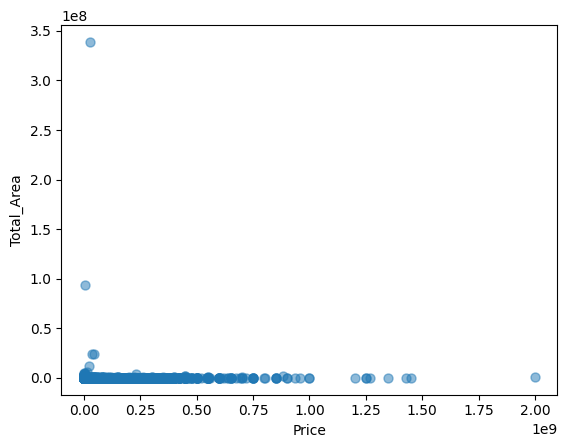

In [58]:
plt.scatter(df['price'], df['Total_Area'], s=42, alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Total_Area')
plt.show()

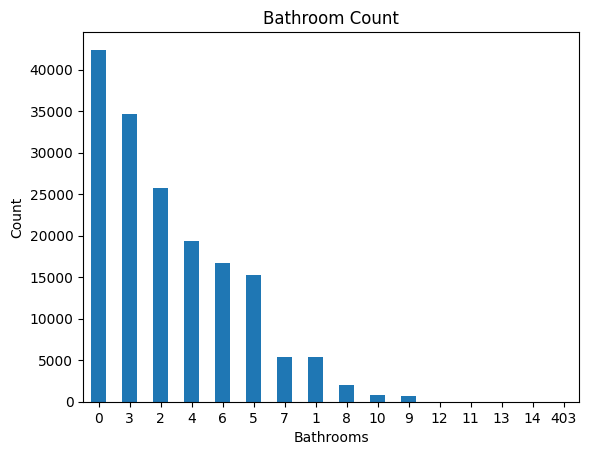

In [59]:
count_bathrooms = df['baths'].value_counts()
count_bathrooms.plot(kind='bar')
plt.title('Bathroom Count')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

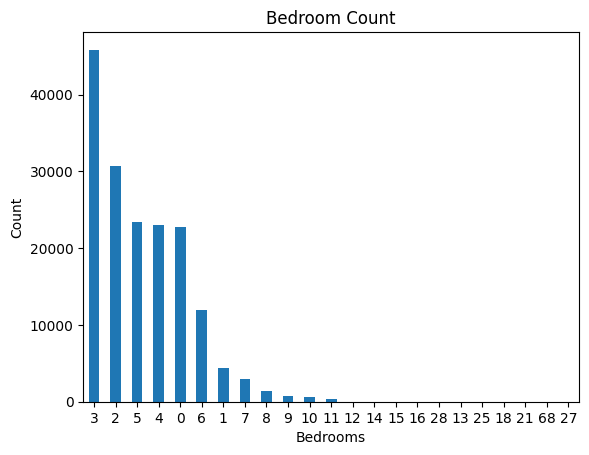

In [60]:
count_bedrooms = df['bedrooms'].value_counts()
count_bedrooms.plot(kind='bar')
plt.title('Bedroom Count')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

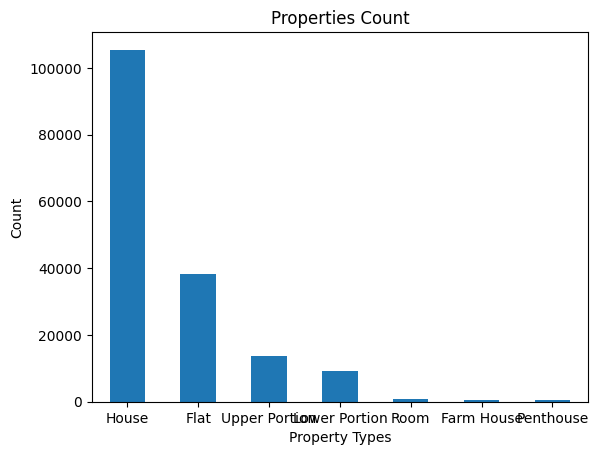

In [61]:
type_property=df['property_type'].value_counts()
type_property.plot(kind='bar')
plt.title('Properties Count')
plt.xlabel('Property Types')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


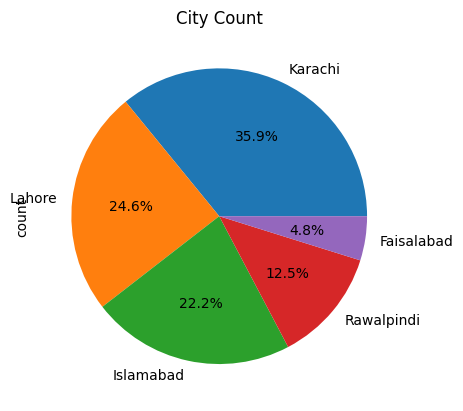

In [62]:
type_city=df['city'].value_counts()
type_city.plot(kind='pie',autopct='%1.1f%%')
plt.title('City Count')
plt.show()


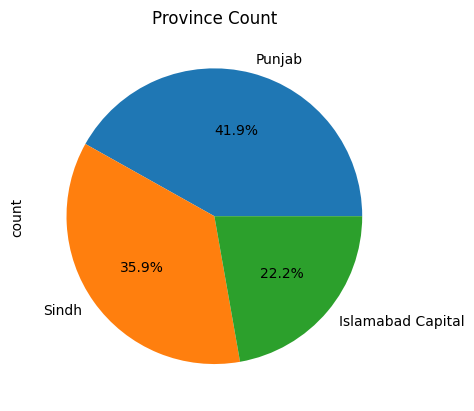

In [63]:
type_province=df['province_name'].value_counts()
type_province.plot(kind='pie',autopct='%1.1f%%')
plt.title('Province Count')
plt.show()


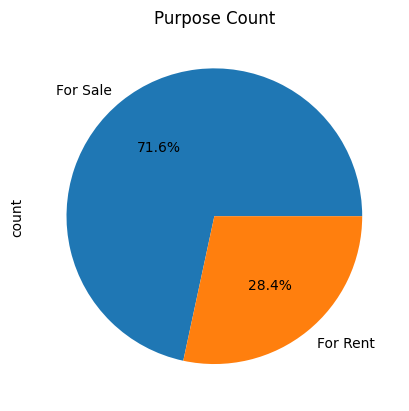

In [64]:
type_purpose=df['purpose'].value_counts()
type_purpose.plot(kind='pie',autopct='%1.1f%%')
plt.title('Purpose Count')
plt.show()


In [65]:
encoder = LabelEncoder()
encoding_cols = ['page_url', 'property_type', 'location', 'city', 'province_name', 'purpose', 'agency', 'agent', 'date_added']
for cols in encoding_cols:
  df[cols] = encoder.fit_transform(df[cols])

In [66]:
x = df.drop(columns=['price'], axis=1)
y = df['price']

In [67]:
scaler = MinMaxScaler()
x=scaler.fit_transform(x)
y=scaler.fit_transform(y.values.reshape(-1, 1))

In [68]:
# I am reserving 20% dataset for 'testing'
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [69]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [70]:
y_pred = dt_model.predict(x_test)

In [71]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [72]:
mae

0.002035038092851489

In [73]:
mse

0.00010548718784842232

In [74]:
dt_acc = r2_score(y_test, y_pred)
dt_acc

0.6359746483693236